## Qiskit
Qiskit is the world’s most popular and performant software stack for quantum computing and algorithms research. Build, optimize, and execute quantum workloads at scale.

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc)


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [9]:
import matplotlib.pyplot as plt

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line
#  of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
# qc.draw("mpl")

In [3]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

## IBM Quantum Initilization

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
  
QiskitRuntimeService.save_account(
    token="in_credential.json",  # IBM Cloud API key.
      # Your token is confidential. Do not share your token in public code.
    instance="Quantum Learnning Test",  # Optionally specify the instance to use.
      # plans_preference="['open', 'premium']", # Optionally set the types of plans to prioritize.  This is ignored if the instance is specified.
      # Additionally, instances of a certain plan type are excluded if the plan name is not specified.
    region="us-east",  # Optionally set the region to prioritize. Accepted values are 'us-east' or 'eu-de'. This is ignored if the instance is specified.
    name="A ANTO KELVIN PRABHU",  # Optionally name this set of account credentials.
    set_as_default=True,  # Optionally set these as your default credentials.
    overwrite=True
)

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you named your credentials, optionally specify the name here, as follows:
# QiskitRuntimeService(name='account-name')
# If you don't specify a name, the default credentials are loaded.
service = QiskitRuntimeService()

In [13]:
service.backends()

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]

## Hello world
 This example contains two parts. You will first create a simple quantum program and run it on a quantum processing unit (QPU). Because actual quantum research requires much more robust programs, in the second section (Scale to large numbers of qubits), you will scale the simple program up to utility level.

## Create and run a simple quantum program
#### The four steps to writing a quantum program using Qiskit patterns are:

#### Map the problem to a quantum-native format.

#### Optimize the circuits and operators.

#### Execute using a quantum primitive function.

 #### Analyze the results.

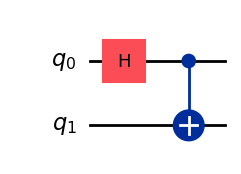

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [7]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [10]:
print(service.backends())


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


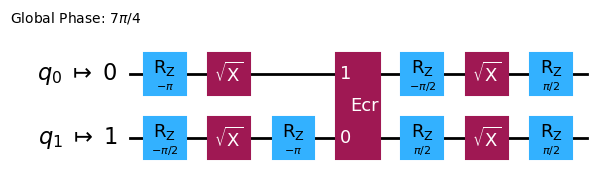

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.backend("ibm_brisbane")
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

In [12]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d38et24da4cs73a9qm60


In [14]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

## Step 4. Analyze the results
The analyze step is typically where you might post-process your results using, for example, measurement error mitigation or zero noise extrapolation (ZNE). You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem. For this example, plot each of the expectation values that were measured for our circuit.

The expectation values and standard deviations for the observables you specified to Estimator are accessed through the job result's PubResult.data.evs and PubResult.data.stds attributes. To obtain the results from Sampler, use the PubResult.data.meas.get_counts() function, which will return a dict of measurements in the form of bitstrings as keys and counts as their corresponding values. For more information, see Get started with Sampler.

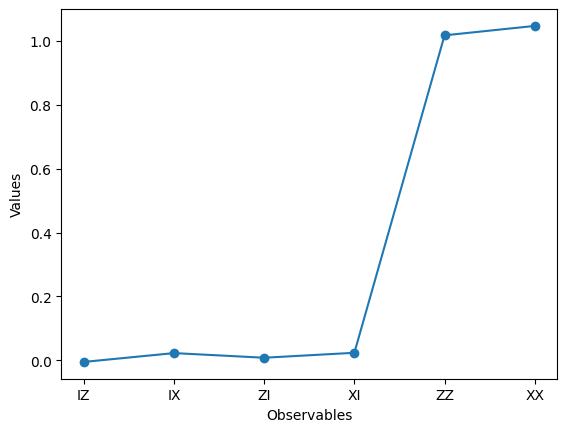

In [15]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Notice that for qubits 0 and 1, the independent expectation values of both X and Z are 0, while the correlations (XX and ZZ) are 1. This is a hallmark of quantum entanglement.

In [ ]:
 
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeFez
backend = FakeFez()
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]

## Scale to large numbers of qubits
In quantum computing, utility-scale work is crucial for making progress in the field. Such work requires computations to be done on a much larger scale; working with circuits that might use over 100 qubits and over 1000 gates. This example demonstrates how you can accomplish utility-scale work on IBM® QPUs by creating and analyzing a 100-qubit GHZ state. It uses the Qiskit patterns workflow and ends by measuring the expectation value 
⟨
Z
0
Z
i
⟩
⟨Z 
0
​
 Z 
i
​
 ⟩ for each qubit.


## Step 1. Map the problem
Write a function that returns a QuantumCircuit that prepares an 
n
n-qubit GHZ state (essentially an extended Bell state), then use that function to prepare a 100-qubit GHZ state and collect the observables to be measured.

In [16]:
from qiskit import QuantumCircuit
 
 
def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:
    """This function will create a qiskit.QuantumCircuit (qc) for an n-qubit GHZ state.
 
    Args:
        n (int): Number of qubits in the n-qubit GHZ state
 
    Returns:
        QuantumCircuit: Quantum circuit that generate the n-qubit GHZ state, assuming all qubits start in the 0 state
    """
    if isinstance(n, int) and n >= 2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n - 1):
            qc.cx(i, i + 1)
    else:
        raise Exception("n is not a valid input")
    return qc
 
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)

In [17]:
from qiskit.quantum_info import SparsePauliOp
 
# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2 - i) for i in range(n - 1)
]
print(operator_strings)
print(len(operator_strings))
 
operators = [SparsePauliOp(operator) for operator in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

## Step 2. Optimize the problem for execution on quantum hardware
The following code transforms the circuit and observables to match the backend's ISA. It requires that you have already saved your credentials

In [18]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
 
# service = QiskitRuntimeService()
 
# backend = service.least_busy(
#     simulator=False, operational=True, min_num_qubits=100
# )
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
 
isa_circuit = pm.run(qc)
isa_operators_list = [op.apply_layout(isa_circuit.layout) for op in operators]

## Step 3. Execute on hardware
Submit the job and enable error suppression by using a technique to reduce errors called dynamical decoupling. The resilience level specifies how much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times. For further explanation of the options set in the following code, see Configure error mitigation for Qiskit Runtime.

In [ ]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"
 
# Create an Estimator object
estimator = Estimator(backend, options=options)

In [19]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()
print(job_id)

d38f1toitjus73f76ufg


## Step 4. Post-process results
After the job completes, plot the results and notice that 
⟨
Z
0
Z
i
⟩
⟨Z 
0
​
 Z 
i
​
 ⟩ decreases with increasing 
i
i, even though in an ideal simulation all 
⟨
Z
0
Z
i
⟩
⟨Z 
0
​
 Z 
i
​
 ⟩ should be 1.

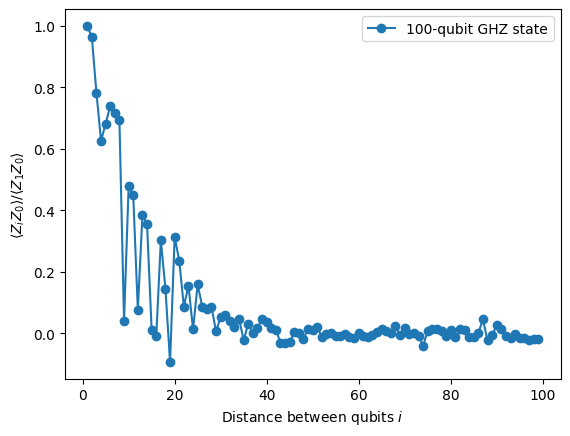

In [20]:
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
 
# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.
 
# plotting graph
plt.plot(data, values, marker="o", label="100-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

## State Vector Simulation IBM QUANTUM COMPUTING

In [21]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler


Step 2: Connect to IBM backend

In [23]:
print("Using backend:", backend.name)

Using backend: ibm_brisbane


Step 3: Define circuits matching

In [24]:
# |0⟩ state (default qubit initialization)
qc0 = QuantumCircuit(1, 1)
qc0.measure(0, 0)

# |1⟩ state
qc1 = QuantumCircuit(1, 1)
qc1.x(0)   # Pauli-X flips |0> → |1>
qc1.measure(0, 0)

# |+⟩ = (|0⟩ + |1⟩)/√2 superposition
qc_plus = QuantumCircuit(1, 1)
qc_plus.h(0)  # Hadamard creates superposition
qc_plus.measure(0, 0)

circuits = [qc0, qc1, qc_plus]


In [27]:
from qiskit import transpile

# assume `backend` is your IBM backend
transpiled_circuits = [transpile(qc, backend=backend) for qc in circuits]

results = []
for qc in transpiled_circuits:
    job = sampler.run([qc], shots=1000)
    results.append(job.result())


In [38]:
results

[PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-22 06:58:20', stop='2025-09-22 06:58:21', size=1000>)])}, 'version': 2}),
 PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-22 06:58:27', stop='2025-09-22 06:58:28', size=1000>)])}, 'version': 2}),
 PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-22 06:58:34', stop='2025-09-22 06:58:35', size=1000>)])}, 'version': 2})]

Circuit 0 counts:
Counter({'0': 993, '1': 7})
Total shots: 1000
P(|0⟩) = 0.993, P(|1⟩) = 0.007


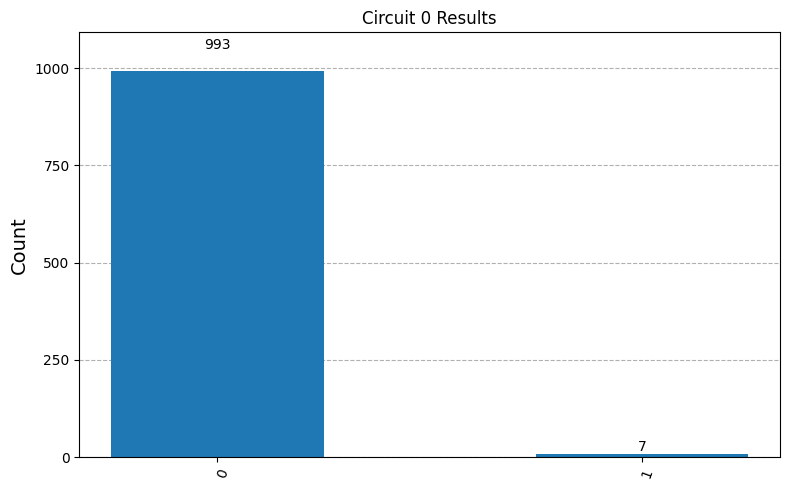

--------------------------------------------------
Circuit 1 counts:
Counter({'1': 988, '0': 12})
Total shots: 1000
P(|0⟩) = 0.012, P(|1⟩) = 0.988


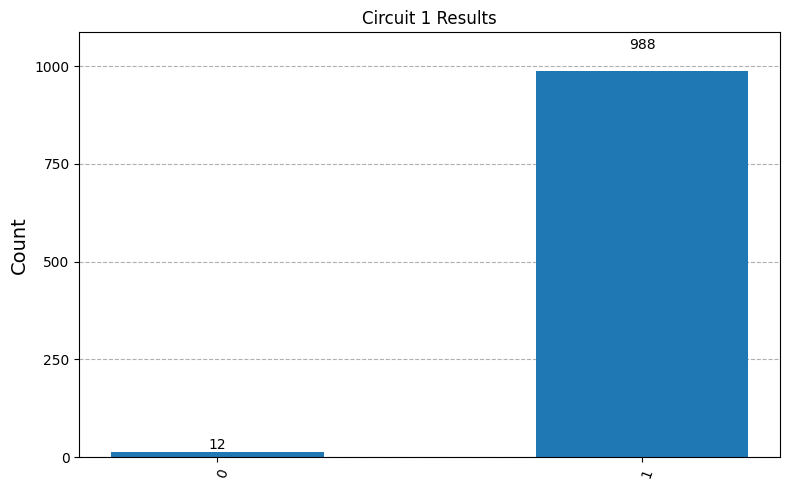

--------------------------------------------------
Circuit 2 counts:
Counter({'1': 525, '0': 475})
Total shots: 1000
P(|0⟩) = 0.475, P(|1⟩) = 0.525


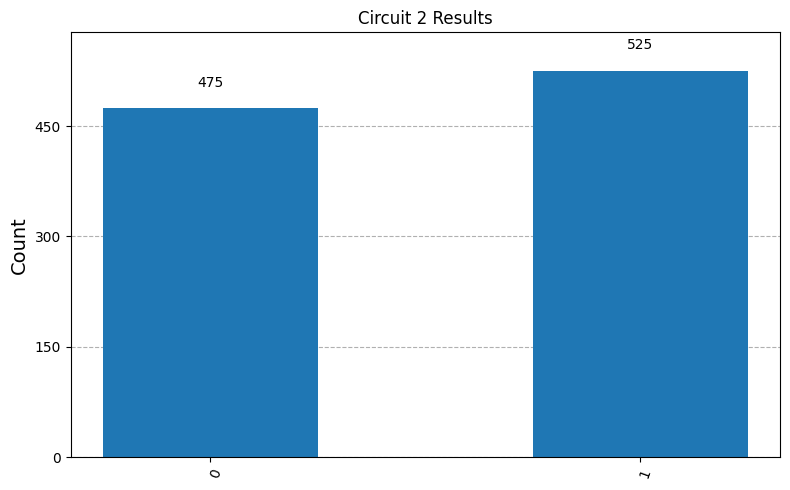

--------------------------------------------------


In [44]:
from collections import Counter
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Ensure plots display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

# Process results - using the simplified approach since it works
for i, primitive_result in enumerate(results):
    sampler_pub = primitive_result[0]
    bitarray = sampler_pub.data.c
    
    # For single qubit circuits, directly work with the array
    raw_bits = bitarray.array
    counts = Counter(str(bit) for bit in raw_bits.flatten())
    
    print(f"Circuit {i} counts:")
    print(counts)
    print(f"Total shots: {sum(counts.values())}")
    
    # Calculate probabilities
    total_shots = sum(counts.values())
    prob_0 = counts.get('0', 0) / total_shots
    prob_1 = counts.get('1', 0) / total_shots
    print(f"P(|0⟩) = {prob_0:.3f}, P(|1⟩) = {prob_1:.3f}")
    
    # Create and display histogram
    plot_histogram(counts, title=f'Circuit {i} Results')
    plt.show()
    
    print("-" * 50)